# 1 Data Preprocessing

### 1.1 Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### 1.2 Loading the datset

In [2]:
df = pd.read_csv("Data/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [4]:
df.head(5)

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


### 1.3 Removing unnecessary columns

In [5]:
# We dont need "id" here
df.pop('id')
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


### 1.4 Visualizing the distributions of the variables

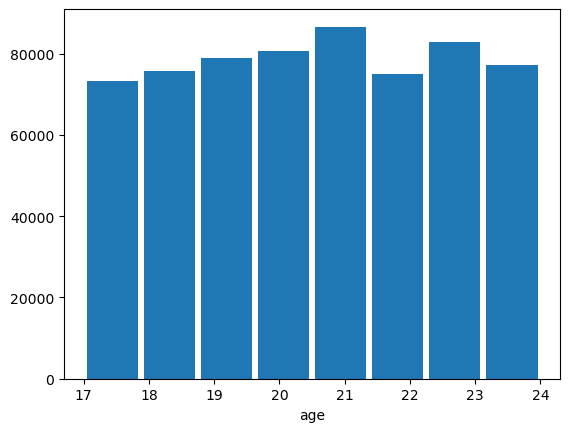

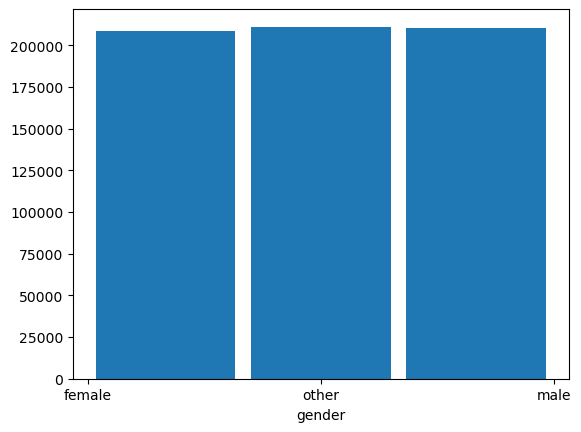

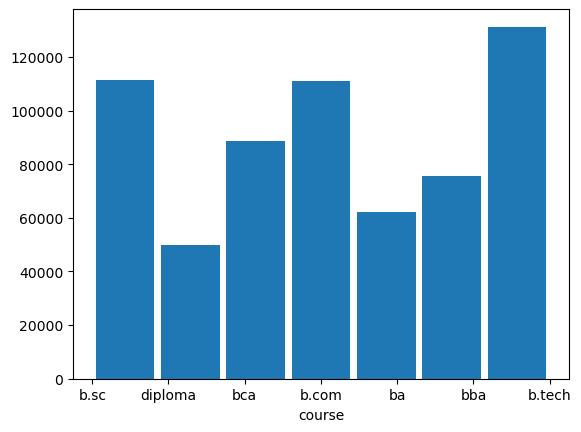

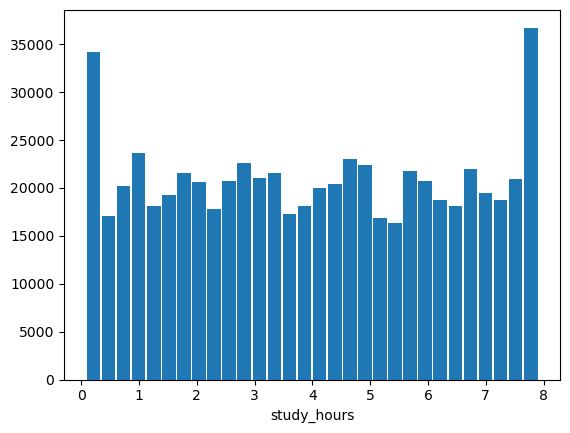

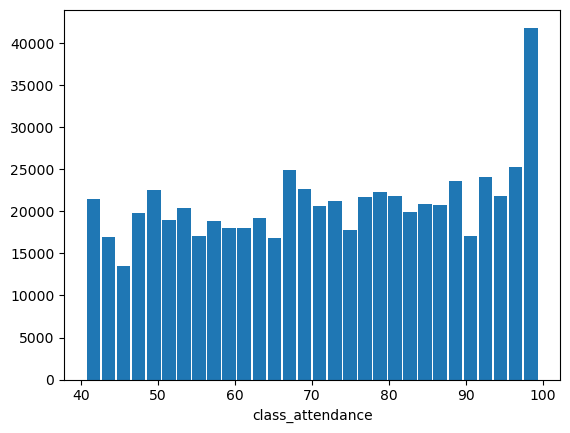

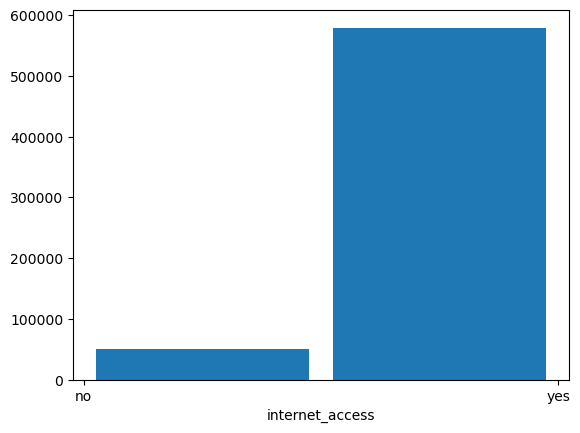

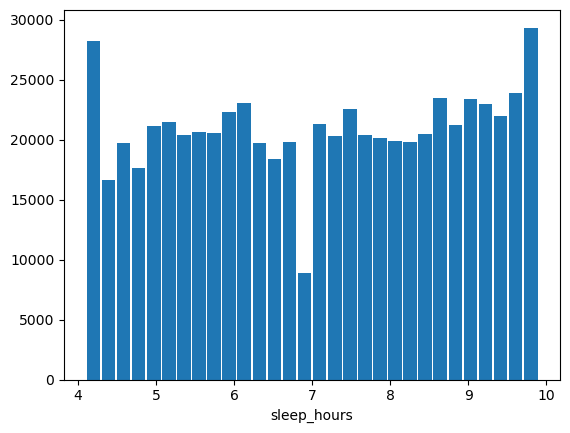

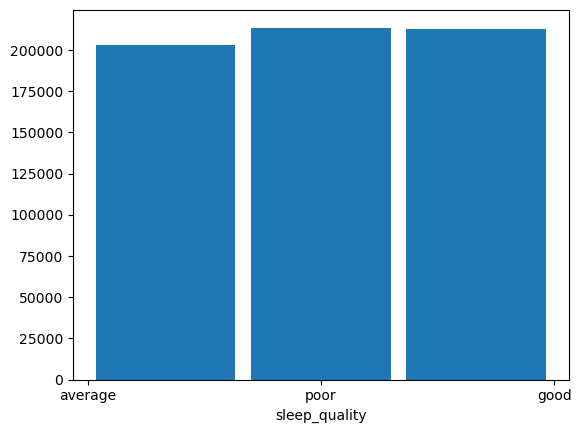

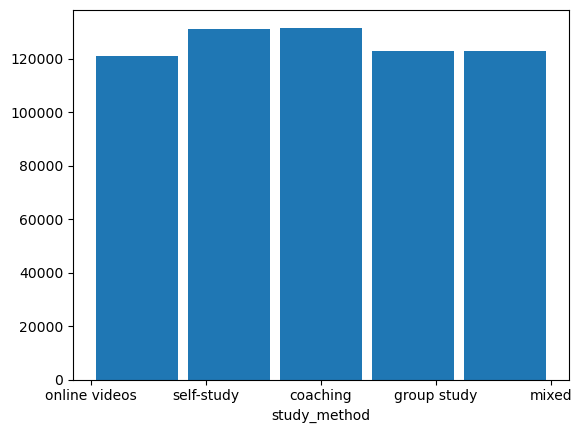

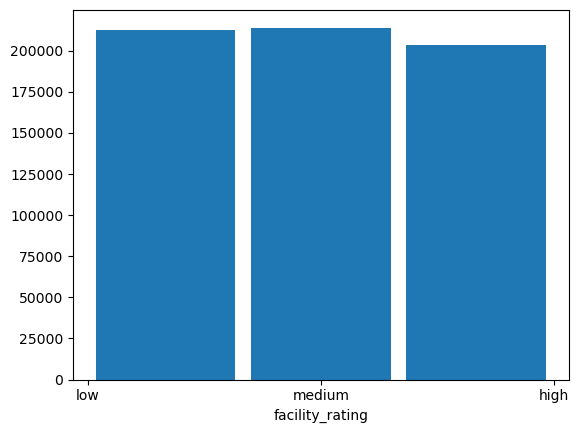

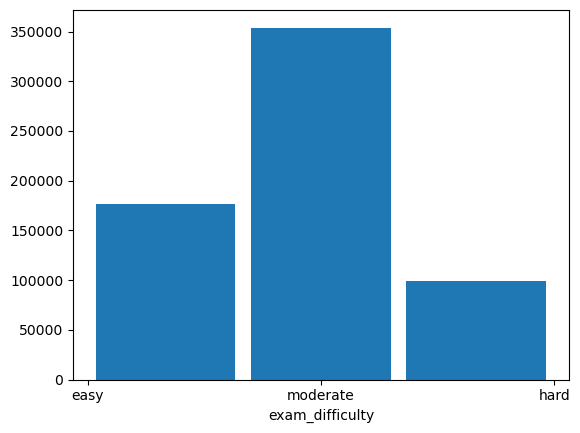

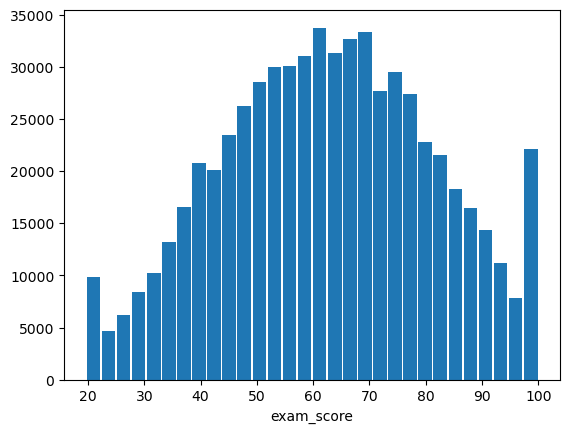

In [6]:
for i in df.columns:
    no_bins = min(df[i].nunique(), 30)
    plt.hist(df[i], bins=no_bins, rwidth=0.9)
    plt.xlabel(i)
    plt.show()

### 1.5 Encoding data

In [7]:
# Label encoding manually
df.sleep_quality = df.sleep_quality.map({"poor":1, "average":2, "good":3})
df.facility_rating = df.facility_rating.map({"low":1, "medium":2, "high":3})
df.exam_difficulty = df.exam_difficulty.map({"easy":1, "moderate":2, "hard":3})


In [8]:
# One-hot encoding other categorical variables
df = pd.get_dummies(df, columns=["gender", "internet_access", "course", "study_method"], drop_first= True, dtype=int)

In [9]:
df.head()

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_male,gender_other,...,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,21,7.91,98.8,4.9,2,1,1,78.3,0,0,...,1,0,0,0,0,0,0,0,1,0
1,18,4.95,94.8,4.7,1,2,2,46.7,0,1,...,0,0,0,0,0,1,0,0,0,1
2,20,4.68,92.6,5.8,1,3,2,99.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,19,2.00,49.5,8.3,2,3,2,63.9,1,0,...,1,0,0,0,0,0,1,0,0,0
4,23,7.65,86.9,9.6,3,3,1,100.0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 1.6 Splitting the dataframe to predictors and target variable

In [10]:
x = df.drop("exam_score", axis=1) # axis = 1 says that we are dropping a column
y = df["exam_score"]

# 2 Multicollinearity

### 2.1 correlation matrix

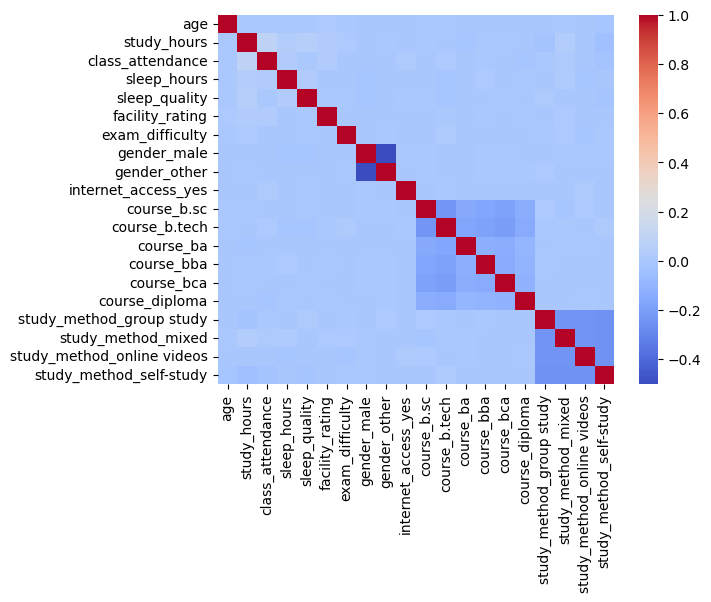

In [11]:
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

### 2.2 VIF

In [12]:
vif_data = pd.DataFrame()

x_vif = add_constant(x)
vif_data["feature"] = x_vif.columns
vif_data["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(len(x_vif.columns))]

print(vif_data.sort_values(by="VIF", ascending= True))

                       feature         VIF
1                          age    1.000450
10         internet_access_yes    1.000726
7              exam_difficulty    1.000903
6              facility_rating    1.002049
4                  sleep_hours    1.004210
5                sleep_quality    1.004636
3             class_attendance    1.010348
2                  study_hours    1.016744
16              course_diploma    1.335658
9                 gender_other    1.339890
8                  gender_male    1.340036
13                   course_ba    1.406036
14                  course_bba    1.480602
15                  course_bca    1.546601
19  study_method_online videos    1.552451
18          study_method_mixed    1.558044
17    study_method_group study    1.559863
20     study_method_self-study    1.586200
11                 course_b.sc    1.651562
12               course_b.tech    1.730614
0                        const  157.152651


# 3 Ready the Test dataset

### 3.1 Load the dataset

In [13]:
df_test = pd.read_csv("Data/test.csv")

### 3.2 Removing unnecessary columns

In [14]:
test_id = df_test["id"]
ids= np.array(test_id)

df_test = df_test.drop("id", axis= 1)

### 3.3 Handling categorical variables

In [15]:
# Label encoding
df_test["sleep_quality"] = df_test["sleep_quality"].map({"poor":1, "average":2, "good":3})
df_test["exam_difficulty"] = df_test["exam_difficulty"].map({"easy":1, "moderate":2, "hard":3})
df_test["facility_rating"] = df_test["facility_rating"].map({"low":1, "medium":2, "high":3})

# One-hot encoding
df_test = pd.get_dummies(df_test, columns=["gender", "internet_access", "course", "study_method"], drop_first= True, dtype=int)

In [16]:
df_test.head()

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,gender_male,gender_other,internet_access_yes,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,24,6.85,65.2,5.2,1,3,1,0,1,1,0,0,1,0,0,0,1,0,0,0
1,18,6.61,45.0,9.3,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,24,6.60,98.5,6.2,3,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0
3,24,3.03,66.3,5.7,2,2,2,1,0,1,0,0,0,0,0,1,0,1,0,0
4,20,2.03,42.4,9.2,2,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0


# 4 Miscellaneous

### 4.1 Standardization

In [17]:
continuous_columns = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality', 'facility_rating', 'exam_difficulty']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x[continuous_columns] = pd.DataFrame(scaler.fit_transform(x[continuous_columns]), columns=continuous_columns)

df_test[continuous_columns] = pd.DataFrame(scaler.transform(df_test[continuous_columns]), columns=continuous_columns)

In [19]:
x.head()

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,gender_male,gender_other,internet_access_yes,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,0.200943,1.655875,1.538302,-1.245269,0.001130,-1.213656,-1.349220,0,0,0,1,0,0,0,0,0,0,0,1,0
1,-1.126352,0.401573,1.308814,-1.359895,-1.213871,0.017268,0.188038,0,1,1,0,0,0,0,0,1,0,0,0,1
2,-0.241488,0.287160,1.182595,-0.729454,-1.213871,1.248192,0.188038,0,0,1,1,0,0,0,0,0,0,0,0,0
3,-0.683920,-0.848492,-1.290141,0.703367,0.001130,1.248192,0.188038,1,0,1,1,0,0,0,0,0,1,0,0,0
4,1.085807,1.545699,0.855575,1.448434,1.216131,1.248192,-1.349220,1,0,1,0,0,0,0,1,0,0,0,0,1


In [20]:

df_test.head()

,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,gender_male,gender_other,internet_access_yes,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,1.528239,1.206699,-0.389399,-1.073331,-1.213871,1.248192,-1.349220,0,1,1,0,0,1,0,0,0,1,0,0,0
1,-1.126352,1.104999,-1.548315,1.276496,-1.213871,-1.213656,-1.349220,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1.528239,1.100761,1.521091,-0.500202,1.216131,0.017268,0.188038,0,0,1,0,1,0,0,0,0,1,0,0,0
3,1.528239,-0.412029,-0.326290,-0.786767,0.001130,0.017268,0.188038,1,0,1,0,0,0,0,0,1,0,1,0,0
4,-0.241488,-0.835779,-1.697482,1.219183,0.001130,-1.213656,0.188038,0,0,1,0,1,0,0,0,0,0,0,0,0


### 4.2 Function to write predicted values along with the Ids

In [21]:
import csv

def pred_to_csv(filename, pred):
    with open(filename, mode = 'w', newline='') as file:
        writer = csv.writer(file)

        # write header row
        writer.writerow(["id", "exam_score"])

        # write rest of the rows
        rows = zip(ids, pred)
        writer.writerows(rows)

    return print("Successfully written the file")

# 5 Models

### 5.1 Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x, y)

pred_train = lr_model.predict(x)

rmse_train = root_mean_squared_error(y, pred_train)
print(rmse_train)

8.895034192063486


In [23]:
pred_lr = lr_model.predict(df_test)

In [24]:
pred_to_csv("Prediction_LR.csv", pred_lr)

Successfully written the file


1) Simple Linear regression = 8.87318

### 4.2 Hist Gradient Boosting

In [25]:
from sklearn.ensemble import HistGradientBoostingRegressor

# This model handles non-linear patterns much better than Linear Regression
hgb_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=5)
hgb_model.fit(x, y)

# Recalculate RMSE
hgb_pred = hgb_model.predict(x)
print(f"New Train RMSE: {root_mean_squared_error(y, hgb_pred)}")

New Train RMSE: 8.79736719712163


In [27]:
pred_hgb = hgb_model.predict(df_test)

pred_to_csv("Prediction_HGB.csv", pred_hgb)

Successfully written the file


2) Hist Gradient Boosting = 8.80383

### 4.3 Random Forests

In [310]:
# Convert your features to a lighter format
x = x.astype('float32')
df_test = df_test.astype('float32')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Initial Random Forest Model
# We start with more trees (n_estimators) to reduce variance
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 4. Evaluate
train_pred = rf_model.predict(X_train)
val_pred = rf_model.predict(X_val)

print(f"RF Train RMSE: {root_mean_squared_error(y_train, train_pred):.4f}")
print(f"RF Validation RMSE: {root_mean_squared_error(y_val, val_pred):.4f}")



RF Train RMSE: 3.3884
RF Validation RMSE: 9.1396


In [311]:
# 5. Hyperparameter Tuning (To hit that 8.5 target)
# Tree models are sensitive to depth and leaf size. 
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # 'sqrt' helps prevent overfitting
}

grid_search = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state=42), 
                           param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Params: {grid_search.best_params_}")
print(f"Tuned Val RMSE: {-grid_search.best_score_:.4f}")



c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
11 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(


Best Params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4}
Tuned Val RMSE: 9.0086


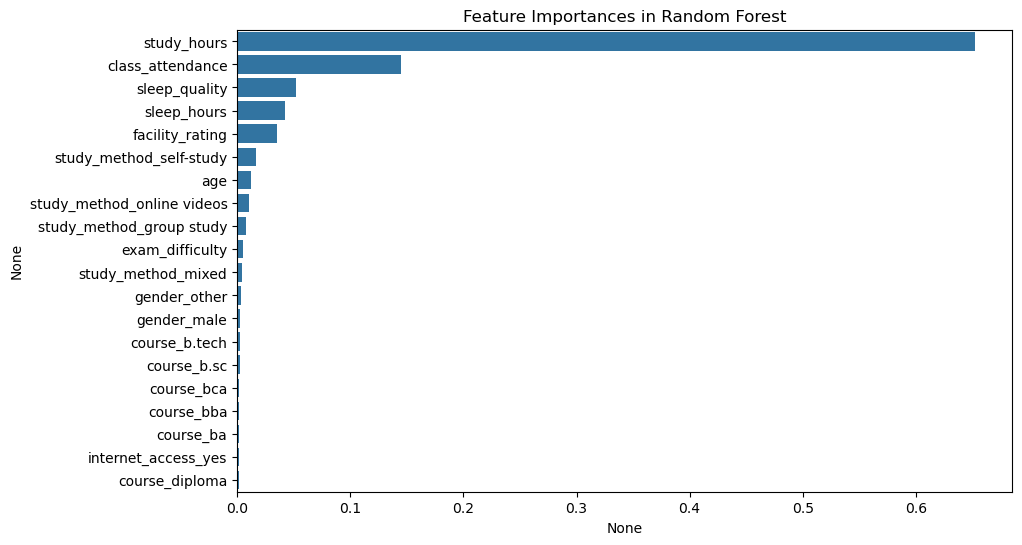

In [312]:
# 6. Feature Importance Visualization
# This tells you WHICH features the model thinks are most important
importances = pd.Series(best_rf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances in Random Forest")
plt.show()



In [313]:
# 7. Final Prediction for Kaggle
# Fit on the WHOLE dataset (X, y) before final prediction
best_rf.fit(x, y)
final_preds = best_rf.predict(df_test).round(1)
pred_to_csv("Prediction_RF.csv", final_preds)

Successfully written the file


In [314]:
import gc

# Delete large objects you no longer need
if 'vif_data' in locals(): del vif_data
if 'x_vif' in locals(): del x_vif
if 'correlation_matrix' in locals(): del correlation_matrix

# Force the garbage collector to free up the RAM
gc.collect()

29110

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.metrics import root_mean_squared_error

# 1. Ensure data is in the correct format for TensorFlow
# NNs perform best when data is float32
X_train_final = x.values.astype('float32')
y_train_final = y.values.astype('float32')
X_test_final = df_test.values.astype('float32')

# 2. Build a Robust Architecture
model = models.Sequential([
    # Input Layer
    layers.Dense(1024, activation='relu', input_shape=(X_train_final.shape[1],)),
    #layers.BatchNormalization(), # Helps the model learn faster and more stable
    #layers.Dropout(0.2),         # Prevents overfitting to the training data
    
    # Hidden Layer 1
    #layers.Dense(128, activation='relu'),
    #layers.BatchNormalization(),
    #layers.Dropout(0.1),
    
    # Hidden Layer 2
    layers.Dense(64, activation='relu'),
    #layers.BatchNormalization(),
    
    # Output Layer
    layers.Dense(1, activation='linear') 
])

# 3. Compile with a specific learning rate
# 0.001 is a good starting point for the Adam optimizer
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# 4. Advanced Callbacks for the #1 Rank
# EarlyStopping: Stops when the model stops improving
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True
)

# ReduceLROnPlateau: Lowers the learning rate when improvement slows down
# This is like a "zoom lens" to find the absolute lowest error point.
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6
)

# 5. Train using your GPU
history = model.fit(
    X_train_final, y_train_final,
    validation_split=0.15, # Use 15% of data to check for overfitting
    epochs=50,            # High epochs, but early_stop will end it early
    batch_size=512,        # Large batch size is efficient for GPU
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# 6. Evaluate and Predict
nn_train_preds = model.predict(X_train_final).flatten()
print(f"Final NN Train RMSE: {root_mean_squared_error(y_train_final, nn_train_preds)}")

nn_test_preds = model.predict(X_test_final).flatten().round(1)
pred_to_csv("Submission_NN.csv", nn_test_preds)

Epoch 1/50


c:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1046/1046 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 572.4144 - root_mean_squared_error: 21.6710 - val_loss: 80.7038 - val_root_mean_squared_error: 8.9835 - learning_rate: 0.0010
Epoch 2/50
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 81.9347 - root_mean_squared_error: 9.0517 - val_loss: 79.9195 - val_root_mean_squared_error: 8.9398 - learning_rate: 0.0010
Epoch 3/50
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 81.5339 - root_mean_squared_error: 9.0296 - val_loss: 80.0089 - val_root_mean_squared_error: 8.9448 - learning_rate: 0.0010
Epoch 4/50
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 81.2095 - root_mean_squared_error: 9.0116 - val_loss: 80.2249 - val_root_mean_squared_error: 8.9568 - learning_rate: 0.0010
Epoch 5/50
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 81.2107 - root_mean_squared_error: 9.0116 - val_loss: 79.8457 - val_root_mean_squared_error: 8.9356 - learning_rate: 0.0010
Epoch 6/50
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 81.0847 - root_me

In [31]:
from lightgbm import LGBMRegressor

# Parameters for high performance
lgbm_model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=63,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    device="gpu" # Since you have a GPU!
)

lgbm_model.fit(x, y)
lgbm_preds = lgbm_model.predict(x)
print(f"LGBM Train RMSE: {root_mean_squared_error(y, lgbm_preds)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 630000, number of used features: 20
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics 770, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (7.21 MB) transferred to GPU in 0.014565 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 62.506672
LGBM Train RMSE: 8.523067421007452


In [32]:
preds_lgbm = lgbm_model.predict(df_test)

pred_to_csv("Submission_LGBM.csv", preds_lgbm)

Successfully written the file
